# Algorithm 1:

## Logistic Regression

##  1. Importing the necessary Libraries

### numpy
        NumPy is the fundamental package for scientific computing with Python. It contains among other things: a powerful N-dimensional array object; sophisticated (broadcasting) functions

### pandas
        In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.
        
### datetime
        In Python, date, time and datetime classes provides a number of function to deal with dates, times and time intervals. Date and datetime are an object in Python, so when you manipulate them, you are actually manipulating objects and not string or timestamps.
        
### matplotlib
        Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

## 2. Importing the dataset
This is done in the following way, Using the Pandas Library.
#### Syntax: 
#### pd.read_csv('File_Name')

### Also

### We need to saperate the Independent and the dependent variables, i.e. x and y respectively.
Here the matrix of 784 features are the independednt variable and the target labels corresponding to each image are the dependent variables.

## 3. Making test and the training set
This is done so that the model trained must have some unseen data to test upon. Therefore 10,000 images are kept aside to test the performance of our model upon.

The MNIST dataset is divided in to 4 parts:

## x_train : 
        The dataset over which the model will be trained upon, it is a set of 60,000 greyscale images. Our Logistic Regression Algorithm will be trained over this data
        
## y_train :
        This is the labelled dataset corresponding to the x_train, this contains the target labels corresponding to the Images of the dataset.
        
## x_test : 
        This is the dataset kept aside to test the Machine Learning model trained upon the Dataset x_train, so that out model will have unseen data to predict and test upon.
        
## y_test :
        This is the labelled dataset corresponding to the x_train, this contains the target labels corresponding to the Images of the dataset.

In [2]:
x_train = pd.read_csv('train_images.csv').values
y_train = pd.read_csv('train_labels.csv').values
x_test  = pd.read_csv('test_images.csv').values
y_test  = pd.read_csv('test_labels.csv').values

## 4. Feature Scaling:
Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

### Standardization
In machine learning, we can handle various types of data, e.g. audio signals and pixel values for image data, and this data can include multiple dimensions. Feature standardization makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance. This method is widely used for normalization in many machine learning algorithms (e.g., support vector machines, logistic regression, and neural networks. The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values (mean is already subtracted) of each feature by its standard deviation.

## Standard Scaler

##  $$x'= \frac{x - mean(x)}{\sigma}$$


## Fitting the Scaler to the x_train
so that the scaler can reshape itself to the X_train Dimensions


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)


StandardScaler(copy=True, with_mean=True, with_std=True)

### Here the warning issued is about the change of values from Interger to Float, which is OKAY for us.

## Now *implementing* the scalar over the x_train and x_test and transforming them to x_train_scaler and x_test_scaler

In [4]:
x_train_scaler = scaler.transform(x_train)
x_test_scaler = scaler.transform(x_test)


## 5. Dimentionality Reduction
Having too many features in the training set can make the training process extremely slow and makes it unlikely to get a good solution.
In statistics, machine learning, and information theory, dimensionality reduction or dimension reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables. It can be divided into feature selection and feature extraction.

## Principal component analysis (PCA)
The main linear technique for dimensionality reduction, principal component analysis, performs a linear mapping of the data to a lower-dimensional space in such a way that the variance of the data in the low-dimensional representation is maximized.

### Ploting the relation between the Variance and the Dimensions

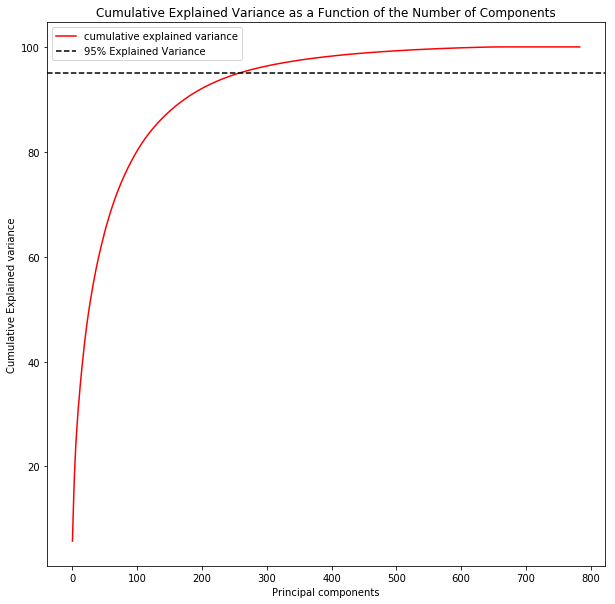

In [5]:
#Using elbow-plot variance/dimensions
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_test_scaler)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(10, 10))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')


### Applying PCA and Transforming x_train_scaler and x_test_scaler to x_train_pca and x_test_pca respectively

In [6]:
from sklearn.decomposition import PCA
pca = PCA(.95) 
pca.fit(x_train_scaler)

x_train_pca = pca.transform(x_train_scaler)
x_test_pca = pca.transform(x_test_scaler)



Here the the min Variance is set to 95%, therefore the the minimum dimentions are chosen keeping the stated Variance.

## 6. Comparing the images before and after applying the PCA

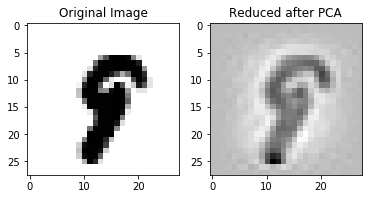

In [7]:
sample = x_train[1234]
sample.shape = (28,28)


a = plt.subplot(1,2,1)
a.set_title('Original Image')
plt.imshow(sample, cmap = plt.cm.gray_r)

sample = pca.inverse_transform(x_train_pca[1234])
sample.shape = (28,28)

b = plt.subplot(1,2,2)
b.set_title("Reduced after PCA")
plt.imshow(sample, cmap = plt.cm.gray_r)



## 7. Logistic Regression:
logistic regression is a regression model where the dependent variable (DV) is categorical, where the output can take only two values, "0" and "1", which represent outcomes such as pass/fail, win/lose, alive/dead or healthy/sick. Cases where the dependent variable has more than two outcome categories may be analysed in multinomial logistic regression.

###### MNIST dataset in a Multivariate Classification problem with 10 classes ( 0, 1, 2, ... , 9)

## Applying the Logistic Regression model:

### GridSearch Cross Validation
In machine learning, two tasks are commonly done at the same time in data pipelines: cross validation and (hyper)parameter tuning. Cross validation is the process of training learners using one set of data and testing it using a different set. Parameter tuning is the process to selecting the values for a model’s parameters that maximize the accuracy of the model.

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# making skeletal model
logistic_regression = LogisticRegression(solver = 'lbfgs')

# Set of parameters we want to try for out Model
parameters = { 'C' : [0.1, 0.09, 0.11]}

#Running the Model with above chosen parameter
grid_search = GridSearchCV(estimator = logistic_regression, param_grid = parameters , scoring = 'accuracy', cv = 3)
grid_scores = grid_search.fit(x_train_pca , y_train)


In [9]:
print( grid_search.best_score_)
print(grid_search.best_params_)

0.9146485774762912
{'C': 0.1}


#### As the best Hyper parameter turns out to be C = 0.1
#### The final model should be made with the above mentioned Hyper-parameters
         

In [10]:
# Making the Final Classification model.
logistic_regression = LogisticRegression(solver = 'lbfgs', C = 0.1)
tick =datetime.datetime.now()
logistic_regression.fit(x_train_pca, y_train)
tock=datetime.datetime.now()
lr_train_time = tock - tick
print("Time taken for training a Logistic Regression model = " + str(lr_train_time))


Time taken for training a Logistic Regression model = 0:00:24.557940


## 8. Predicting values on training set

In [21]:
tick=datetime.datetime.now()
lr_train_predict=logistic_regression.predict(x_train_pca)
tock=datetime.datetime.now()
lr_pred_train_time = tock - tick
print('Time taken to predict the data point sin the Test se t is : ' + str(lr_pred_train_time))

Time taken to predict the data point sin the Test se t is : 0:00:00.101395


## 9. Confusion Matrix (Training Set)
In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix,is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa).The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabelling one as another).

It is a special kind of contingency table, with two dimensions ("actual" and "predicted"), and identical sets of "classes" in both dimensions (each combination of dimension and class is a variable in the contingency table).



![alt text](f1.png "Title")

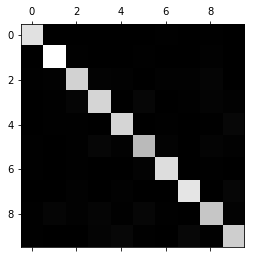

In [22]:
#Making the confusion Matrix

from sklearn.metrics import confusion_matrix
cf= confusion_matrix(y_train, lr_train_predict)

# Visualizing the Confusion Matrix`

plt.matshow(cf , cmap = plt.cm.gray, )
plt.show()



### Here the rows represent the ACTUAL CLASS and the columns represent PREDICTED CLASS.
the whiteness across the diagonal shows the high values that Most of the class were predicted correctly.

## 10. Error Analysis (Training Set)

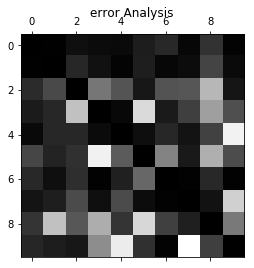

In [23]:
# Analyzing the Errors
row_sums = cf.sum(axis=1 , keepdims = True)
normal_cf = cf/row_sums

np.fill_diagonal(normal_cf,0)
plt.matshow(normal_cf,cmap = plt.cm.gray)

plt.title("error Analysis")
plt.show()



### Looking at the error analysis:

#### most prominent errors are:

$4,9$ and $9,4$

$9,7$ and $7,9$

$8,5$ but not $5,8$

$5,3$ and $3,5$



##### That is these values were often misunderstood ,
##### but it should also be noted that the most of the errors are not symmetrical.

## 11. Accuracy on Training Set

In [24]:
k = logistic_regression.score(x_train_pca, y_train)
print('the Accuracy on the Training set come out to be : ' + str(k))

the Accuracy on the Training set come out to be : 0.924465407756796


##### Accuracy on the training set came out to be $92.51$% which is vey good indeed.

## 12. Lets have a look at the classification report of prediction on training set

### True Positives (TP) - 
These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes. E.g. if actual class value indicates that this passenger survived and predicted class tells you the same thing.

### True Negatives (TN) - 
These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no. E.g. if actual class says this passenger did not survive and predicted class tells you the same thing.

False positives and false negatives, these values occur when your actual class contradicts with the predicted class.

### False Positives (FP) –
When actual class is no and predicted class is yes. E.g. if actual class says this passenger did not survive but predicted class tells you that this passenger will survive.

### False Negatives (FN) –
When actual class is yes but predicted class in no. E.g. if actual class value indicates that this passenger survived and predicted class tells you that passenger will die.

Once you understand these four parameters then we can calculate Accuracy, Precision, Recall and F1 score.

### F1 Score
In statistical analysis of binary classification, the F1 score (also F-score or F-measure) is a measure of a test's accuracy. It considers both the precision p and the recall r of the test to compute the score: p is the number of correct positive results divided by the number of all positive results returned by the classifier, and r is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive). The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

 ### $$F1 =\frac{2}{\frac{1}{Precision} + \frac{1} {Recall} }$$

In [25]:
import sklearn.metrics as skm
print(skm.classification_report( y_train , lr_train_predict ))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97      5923
          1       0.95      0.97      0.96      6742
          2       0.92      0.91      0.91      5958
          3       0.91      0.89      0.90      6131
          4       0.92      0.94      0.93      5842
          5       0.90      0.88      0.89      5420
          6       0.95      0.96      0.96      5918
          7       0.94      0.94      0.94      6265
          8       0.89      0.87      0.88      5851
          9       0.90      0.89      0.89      5949

avg / total       0.92      0.92      0.92     59999



## The F1 Score comes out to be 0.92, which is reasonably good.

## 13. Predicting values on the Test Set

In [26]:
tick=datetime.datetime.now()
lr_test_predict=logistic_regression.predict(x_test_pca)
tock=datetime.datetime.now()
lr_test_time = tock - tick
print(lr_test_time)

0:00:00.014247


## 14. Confusion Matrix (Test Set)

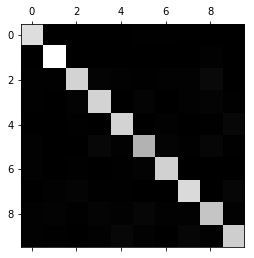

In [27]:
#Making the confusion Matrix

from sklearn.metrics import confusion_matrix
cf= confusion_matrix(y_test, lr_test_predict)

# Visualizing the Confusion Matrix`

plt.matshow(cf , cmap = plt.cm.gray, )
plt.show()




## 15. Error Analysis( Test Set )

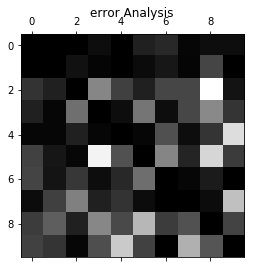

In [28]:
# Analyzing the Errors
row_sums = cf.sum(axis=1 , keepdims = True)
normal_cf = cf/row_sums

np.fill_diagonal(normal_cf,0)
plt.matshow(normal_cf,cmap = plt.cm.gray)

plt.title("error Analysis")
plt.show()



## 16. Accuracy on Test Set

In [29]:
lr_score = logistic_regression.score(x_test_pca, y_test)
print('the Accuracy on the test set comes out to be : ' + str(lr_score))

the Accuracy on the test set comes out to be : 0.922092209220922


## 17. Finding F1 Score on the test set.

In [30]:
import sklearn.metrics as skm
print(skm.classification_report( y_test , lr_test_predict ))

             precision    recall  f1-score   support

          0       0.95      0.98      0.96       980
          1       0.96      0.98      0.97      1135
          2       0.94      0.89      0.91      1032
          3       0.91      0.92      0.91      1010
          4       0.92      0.93      0.93       982
          5       0.90      0.87      0.88       892
          6       0.94      0.95      0.94       958
          7       0.93      0.92      0.93      1027
          8       0.87      0.88      0.87       974
          9       0.91      0.89      0.90      1009

avg / total       0.92      0.92      0.92      9999



### F1 score comes out to be above 0.9, i,e, model is reasonably good.

## And thats it, Contratulations to making it to the end of tutorial like Classification on MNIST dataset. I hope most of the trivial aspects are covered in this Notebook.
## Stay Tuned for more.